<center><h1><b>3주차 ✅ 국가건강검진 데이터 EDA</b></h1></center>

---

<center><h2><b>데이터 가져오기</b></h2></center>


In [328]:
# 라이브러리 import
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# df_raw_raw 행/열 전체 보기
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [120]:
# plt 한글화
import platform


def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin":
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum - qq > /dev/null
        !fc-cache - fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = "NanumBarunGothic"
    return font_family


# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

In [124]:
import matplotlib.pyplot as plt

# plt.style.use('ggplot')
plt.rc('font', family=get_font_family())
plt.rc('axes', unicode_minus=False)

In [65]:
# data 폴더 안 raw 데이터 확인
import glob

glob.glob('data/*')

['data/국민건강보험공단_건강검진정보_20211229.CSV']

In [249]:
# 데이터 불러오기
df_raw = pd.read_csv('data/국민건강보험공단_건강검진정보_20211229.CSV', encoding='cp949')[:500]
df_raw.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,1.0,1.0,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,1.0,1.0,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,1.0,1.0,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,1.0,2.0,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,1.0,1.0,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [143]:
# 행/열 확인
df_raw.shape

(500, 31)

In [144]:
# 일부 정보 확인
df_raw.tail()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
495,2020,496,11,1,9,175,60,74.0,0.1,0.8,1.0,1.0,116.0,73.0,91.0,183.0,61.0,60.0,110.0,16.3,1.0,0.7,22.0,12.0,16.0,1.0,1.0,0,NaN,NaN,2021-12-29
496,2020,497,41,2,9,165,60,67.0,1.2,0.8,1.0,1.0,117.0,80.0,90.0,NaN,NaN,NaN,NaN,14.1,1.0,0.7,31.0,27.0,13.0,1.0,0.0,0,NaN,NaN,2021-12-29
497,2020,498,11,2,13,155,55,79.0,1.0,1.0,1.0,1.0,111.0,65.0,104.0,232.0,117.0,48.0,161.0,12.8,1.0,0.5,20.0,24.0,21.0,1.0,1.0,0,NaN,NaN,2021-12-29
498,2020,499,46,1,11,165,75,88.0,2.0,0.9,1.0,1.0,119.0,88.0,87.0,NaN,NaN,NaN,NaN,15.9,1.0,1.1,22.0,16.0,27.0,1.0,1.0,0,NaN,NaN,2021-12-29
499,2020,500,11,1,10,165,60,78.1,0.9,1.2,1.0,1.0,125.0,85.0,118.0,206.0,96.0,45.0,141.0,18.7,1.0,0.8,17.0,26.0,43.0,3.0,1.0,0,NaN,NaN,2021-12-29


In [145]:
# 일부 정보 확인
df_raw.sample(5)


,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
233,2020,234,11,2,10,160,60,71.0,0.9,1.2,1.0,1.0,118.0,73.0,96.0,NaN,NaN,NaN,NaN,13.1,1.0,0.7,19.0,14.0,9.0,1.0,1.0,0,NaN,NaN,2021-12-29
95,2020,96,47,2,9,160,50,69.0,1.2,1.2,1.0,1.0,108.0,76.0,85.0,174.0,80.0,55.0,103.0,13.1,1.0,0.8,25.0,19.0,16.0,1.0,1.0,1,0.0,0.0,2021-12-29
209,2020,210,45,2,10,150,40,66.0,1.0,1.0,1.0,1.0,119.0,63.0,94.0,NaN,NaN,NaN,NaN,13.1,1.0,0.7,24.0,15.0,13.0,1.0,1.0,0,NaN,NaN,2021-12-29
365,2020,366,41,1,11,160,60,84.0,1.5,1.5,1.0,1.0,120.0,75.0,94.0,221.0,132.0,53.0,142.0,14.4,1.0,0.9,22.0,21.0,35.0,3.0,1.0,1,0.0,1.0,2021-12-29
488,2020,489,44,2,13,155,65,86.0,0.7,0.7,1.0,1.0,139.0,86.0,96.0,NaN,NaN,NaN,NaN,13.0,1.0,1.0,20.0,18.0,13.0,1.0,1.0,0,NaN,NaN,2021-12-29


In [146]:
# 컬럼명 총 확인
df_raw.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자'],
      dtype='object')

In [429]:
# 요약 정보
df_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   기준년도          500 non-null    int64   
 1   가입자 일련번호      500 non-null    int64   
 2   시도코드          500 non-null    category
 3   성별코드          500 non-null    category
 4   연령대 코드(5세단위)  500 non-null    category
 5   신장(5Cm단위)     500 non-null    category
 6   체중(5Kg 단위)    500 non-null    category
 7   허리둘레          500 non-null    float64 
 8   시력(좌)         500 non-null    category
 9   시력(우)         500 non-null    category
 10  청력(좌)         500 non-null    category
 11  청력(우)         500 non-null    category
 12  수축기 혈압        494 non-null    float64 
 13  이완기 혈압        494 non-null    float64 
 14  식전혈당(공복혈당)    494 non-null    float64 
 15  총 콜레스테롤       205 non-null    float64 
 16  트리글리세라이드      205 non-null    float64 
 17  HDL 콜레스테롤     205 non-null    float64 
 18  LDL 콜레스테롤 

---

<center><h2><b>기술 통계</b></h2></center>


In [148]:
# 요약 통계 (수치형)
df_raw.describe()


,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석
count,500.0,500.000000,500.000000,500.0000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,494.000000,494.000000,494.000000,205.000000,205.000000,205.000000,201.000000,494.000000,492.000000,494.000000,494.000000,494.000000,494.000000,500.000000,500.000000,500.000000,140.000000,140.000000
mean,2020.0,250.500000,34.532000,1.5200,11.838000,161.080000,62.810000,81.76360,0.911400,0.930200,1.054000,1.040000,124.265182,76.730769,103.730769,199.185366,128.302439,56.580488,117.174129,14.183198,1.144309,0.838664,27.052632,25.925101,39.062753,1.552000,0.586000,0.280000,0.171429,0.564286
std,0.0,144.481833,12.140666,0.5001,2.122443,9.181623,12.109797,9.33581,0.522759,0.508749,0.243315,0.206119,13.885234,9.639674,26.121001,45.192885,81.101826,15.061951,39.561276,1.536698,0.531596,0.219955,12.634239,17.075196,63.655307,0.780072,0.493042,0.449449,0.378236,0.602282
min,2020.0,1.000000,11.000000,1.0000,9.000000,135.000000,35.000000,53.00000,0.100000,0.100000,1.000000,1.000000,90.000000,46.000000,65.000000,89.000000,24.000000,24.000000,26.000000,7.400000,1.000000,0.300000,9.000000,4.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.0,125.750000,27.000000,1.0000,10.000000,155.000000,55.000000,75.00000,0.700000,0.700000,1.000000,1.000000,116.000000,70.000000,92.000000,168.000000,76.000000,45.000000,88.000000,13.200000,1.000000,0.700000,20.000000,16.000000,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2020.0,250.500000,41.000000,2.0000,12.000000,160.000000,60.000000,82.00000,0.900000,0.900000,1.000000,1.000000,124.000000,77.000000,98.000000,200.000000,106.000000,55.000000,113.000000,14.150000,1.000000,0.800000,24.000000,21.000000,23.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,2020.0,375.250000,44.000000,2.0000,13.000000,170.000000,70.000000,88.00000,1.050000,1.000000,1.000000,1.000000,133.000000,83.000000,108.000000,229.000000,154.000000,66.000000,143.000000,15.200000,1.000000,1.000000,30.000000,30.000000,38.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,2020.0,500.000000,49.000000,2.0000,18.000000,190.000000,120.000000,110.00000,9.900000,9.900000,3.000000,3.000000,191.000000,110.000000,367.000000,373.000000,528.000000,117.000000,242.000000,19.300000,6.000000,1.900000,129.000000,147.000000,999.000000,3.000000,1.000000,1.000000,1.000000,2.000000


In [149]:
# 요약 통계 (범주형)
df_raw.describe(include='object')

,데이터 공개일자
count,500
unique,1
top,2021-12-29
freq,500


In [150]:
# 결측치 확인
df_raw.isnull().sum()

기준년도              0
가입자 일련번호          0
시도코드              0
성별코드              0
연령대 코드(5세단위)      0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기 혈압            6
이완기 혈압            6
식전혈당(공복혈당)        6
총 콜레스테롤         295
트리글리세라이드        295
HDL 콜레스테롤       295
LDL 콜레스테롤       299
혈색소               6
요단백               8
혈청크레아티닌           6
(혈청지오티)AST        6
(혈청지오티)ALT        6
감마 지티피            6
흡연상태              0
음주여부              0
구강검진 수검여부         0
치아우식증유무         360
치석              360
데이터 공개일자          0
dtype: int64

In [151]:
# 결측치 총계
df_raw.isnull().sum().sum()


1960

In [152]:
# 상관계수
df_raw.corr().style.background_gradient(cmap='coolwarm')


/Users/yeomss/opt/anaconda3/lib/python3.9/site-packages/pandas/io/formats/style.py:3554: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/Users/yeomss/opt/anaconda3/lib/python3.9/site-packages/pandas/io/formats/style.py:3555: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석
기준년도,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
가입자 일련번호,nan,1.000000,-0.012723,-0.037415,-0.041873,0.055419,0.063394,0.025719,-0.044203,-0.003453,-0.015591,-0.043000,-0.055348,-0.034607,-0.078935,0.006000,-0.044232,-0.008825,0.014579,0.003461,0.047434,0.033517,0.036738,0.041457,0.032381,0.010900,0.033463,0.021849,0.150440,-0.088515
시도코드,nan,-0.012723,1.000000,-0.048955,0.038271,0.008858,0.031385,0.070654,0.072930,0.034868,0.054704,0.001890,0.000565,-0.017572,0.051886,-0.044601,0.137699,-0.127603,-0.060021,0.001360,0.016693,0.033453,0.054458,0.062042,-0.032189,0.051878,-0.043816,-0.042779,-0.065066,-0.080389
성별코드,nan,-0.037415,-0.048955,1.000000,0.068195,-0.740112,-0.572667,-0.422893,-0.087111,-0.181571,0.032280,0.011665,-0.124874,-0.134894,-0.121687,0.079984,-0.218039,0.324975,0.043525,-0.565372,0.022317,-0.606330,-0.113209,-0.198777,-0.187759,-0.593423,-0.344282,-0.114123,-0.164133,-0.140871
연령대 코드(5세단위),nan,-0.041873,0.038271,0.068195,1.000000,-0.334989,-0.243842,0.090078,-0.202792,-0.155441,0.222643,0.234723,0.174216,-0.036675,0.095426,-0.191482,-0.101553,-0.097326,-0.165952,-0.193842,-0.009945,0.111374,0.093735,-0.053042,-0.034396,-0.173436,-0.372542,-0.099410,-0.037407,-0.014682
신장(5Cm단위),nan,0.055419,0.008858,-0.740112,-0.334989,1.000000,0.703961,0.364414,0.115380,0.240333,-0.115861,-0.086408,0.033353,0.097932,0.095121,-0.034714,0.137226,-0.173653,-0.002497,0.495570,-0.020504,0.439779,0.112857,0.203284,0.141744,0.511169,0.349085,0.103826,0.098864,0.077282
체중(5Kg 단위),nan,0.063394,0.031385,-0.572667,-0.243842,0.703961,1.000000,0.771615,0.098129,0.152905,-0.095810,-0.045121,0.227047,0.237189,0.133147,-0.014934,0.285757,-0.375639,0.025133,0.443068,-0.004725,0.342173,0.230796,0.398386,0.183650,0.395527,0.274110,0.077911,0.183744,0.146143
허리둘레,nan,0.025719,0.070654,-0.422893,0.090078,0.364414,0.771615,1.000000,0.052814,0.082332,0.011189,0.060536,0.309026,0.246707,0.179935,-0.071454,0.329439,-0.454158,-0.044015,0.341913,0.010421,0.312235,0.218987,0.331376,0.203208,0.262669,0.109308,0.021204,0.133778,0.232337
시력(좌),nan,-0.044203,0.072930,-0.087111,-0.202792,0.115380,0.098129,0.052814,1.000000,0.272532,-0.055267,-0.037718,-0.005731,0.021047,-0.038726,0.113465,-0.030029,-0.028328,0.159002,0.088052,-0.009166,0.009903,0.023301,0.067193,0.029133,0.038595,0.096878,0.007711,0.072955,-0.012152
시력(우),nan,-0.003453,0.034868,-0.181571,-0.155441,0.240333,0.152905,0.082332,0.272532,1.000000,-0.058531,-0.072697,0.048255,0.008575,-0.066917,-0.031164,0.004128,0.015236,-0.036726,0.087544,-0.003732,0.057193,-0.002653,0.052001,0.031077,0.057388,0.081902,-0.001122,0.026319,0.007759


In [76]:
# 고유값의 개수
df_raw.nunique()


기준년도                  1
가입자 일련번호        1000000
시도코드                 17
성별코드                  2
연령대 코드(5세단위)         10
신장(5Cm단위)            14
체중(5Kg 단위)           22
허리둘레                777
시력(좌)                24
시력(우)                24
청력(좌)                 3
청력(우)                 3
수축기 혈압              174
이완기 혈압              126
식전혈당(공복혈당)          491
총 콜레스테롤             429
트리글리세라이드           1329
HDL 콜레스테롤           340
LDL 콜레스테롤           362
혈색소                 196
요단백                   6
혈청크레아티닌             188
(혈청지오티)AST          580
(혈청지오티)ALT          637
감마 지티피              971
흡연상태                  3
음주여부                  2
구강검진 수검여부             2
치아우식증유무               2
치석                    3
데이터 공개일자              1
dtype: int64

In [250]:
# 범주형 타입으로 변경
# 성별, 연령대, 신장, 체중, 청력, 요단백, 흡연상태, 음주여부, 구강검진 수검여부, 치아우식증유무, 치석

obejects = [
    "시도코드", "성별코드", "연령대 코드(5세단위)", "신장(5Cm단위)", "체중(5Kg 단위)",
    "시력(좌)", "시력(우)", "청력(좌)", "청력(우)", "요단백", "흡연상태", "음주여부",
    "구강검진 수검여부", "치아우식증유무", "치석"]

for o in obejects:
    df_raw[o] = df_raw[o].astype('category')
    # df[o] = df[o].astype('str') # str 하면 object 타입으로 변경

In [251]:
# 범주형 타입으로 잘 변경됐는지 확인
df_raw.dtypes


기준년도               int64
가입자 일련번호           int64
시도코드            category
성별코드            category
연령대 코드(5세단위)    category
신장(5Cm단위)       category
체중(5Kg 단위)      category
허리둘레             float64
시력(좌)           category
시력(우)           category
청력(좌)           category
청력(우)           category
수축기 혈압           float64
이완기 혈압           float64
식전혈당(공복혈당)       float64
총 콜레스테롤          float64
트리글리세라이드         float64
HDL 콜레스테롤        float64
LDL 콜레스테롤        float64
혈색소              float64
요단백             category
혈청크레아티닌          float64
(혈청지오티)AST       float64
(혈청지오티)ALT       float64
감마 지티피           float64
흡연상태            category
음주여부            category
구강검진 수검여부       category
치아우식증유무         category
치석              category
데이터 공개일자          object
dtype: object

In [155]:
# 개별 확인
type(df_raw['시도코드'].iloc[0])


numpy.int64

In [156]:
# 수치형 데이터 기술통계
df_raw.describe()


,기준년도,가입자 일련번호,허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피
count,500.0,500.000000,500.00000,494.000000,494.000000,494.000000,205.000000,205.000000,205.000000,201.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,2020.0,250.500000,81.76360,124.265182,76.730769,103.730769,199.185366,128.302439,56.580488,117.174129,14.183198,0.838664,27.052632,25.925101,39.062753
std,0.0,144.481833,9.33581,13.885234,9.639674,26.121001,45.192885,81.101826,15.061951,39.561276,1.536698,0.219955,12.634239,17.075196,63.655307
min,2020.0,1.000000,53.00000,90.000000,46.000000,65.000000,89.000000,24.000000,24.000000,26.000000,7.400000,0.300000,9.000000,4.000000,7.000000
25%,2020.0,125.750000,75.00000,116.000000,70.000000,92.000000,168.000000,76.000000,45.000000,88.000000,13.200000,0.700000,20.000000,16.000000,16.000000
50%,2020.0,250.500000,82.00000,124.000000,77.000000,98.000000,200.000000,106.000000,55.000000,113.000000,14.150000,0.800000,24.000000,21.000000,23.000000
75%,2020.0,375.250000,88.00000,133.000000,83.000000,108.000000,229.000000,154.000000,66.000000,143.000000,15.200000,1.000000,30.000000,30.000000,38.000000
max,2020.0,500.000000,110.00000,191.000000,110.000000,367.000000,373.000000,528.000000,117.000000,242.000000,19.300000,1.900000,129.000000,147.000000,999.000000


In [252]:
# 범주형 데이터 기술통계
df_raw.describe(include='category')


,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),시력(좌),시력(우),청력(좌),청력(우),요단백,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석
count,500,500,500,500,500,500.0,500.0,500.0,500.0,492.0,500.0,500.0,500,140.0,140.0
unique,17,2,10,12,16,14.0,14.0,3.0,3.0,5.0,3.0,2.0,2,2.0,3.0
top,41,2,11,155,55,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0.0,0.0
freq,136,260,91,105,94,106.0,113.0,475.0,481.0,449.0,314.0,293.0,360,116.0,69.0


In [253]:
# 고유값 별개로 확인
for o in obejects:
    print(o)
    print(df_raw[o].unique())


시도코드
[36, 27, 11, 31, 41, ..., 26, 47, 45, 29, 49]
Length: 17
Categories (17, int64): [11, 26, 27, 28, ..., 46, 47, 48, 49]
성별코드
[1, 2]
Categories (2, int64): [1, 2]
연령대 코드(5세단위)
[9, 13, 12, 17, 14, 16, 11, 10, 15, 18]
Categories (10, int64): [9, 10, 11, 12, ..., 15, 16, 17, 18]
신장(5Cm단위)
[165, 150, 155, 160, 185, ..., 170, 140, 180, 190, 135]
Length: 12
Categories (12, int64): [135, 140, 145, 150, ..., 175, 180, 185, 190]
체중(5Kg 단위)
[60, 65, 55, 70, 50, ..., 40, 35, 95, 110, 100]
Length: 16
Categories (16, int64): [35, 40, 45, 50, ..., 95, 100, 110, 120]
시력(좌)
[1.2, 0.8, 0.6, 1.0, 1.5, ..., 0.2, 0.3, 0.1, 2.0, 9.9]
Length: 14
Categories (14, float64): [0.1, 0.2, 0.3, 0.4, ..., 1.2, 1.5, 2.0, 9.9]
시력(우)
[1.5, 0.8, 0.7, 1.0, 1.2, ..., 0.4, 0.1, 0.2, 9.9, 2.0]
Length: 14
Categories (14, float64): [0.1, 0.2, 0.3, 0.4, ..., 1.2, 1.5, 2.0, 9.9]
청력(좌)
[1.0, 2.0, 3.0]
Categories (3, float64): [1.0, 2.0, 3.0]
청력(우)
[1.0, 2.0, 3.0]
Categories (3, float64): [1.0, 2.0, 3.0]
요단백
[1.0, NaN, 3.0, 2.

/var/folders/21/dvhd5rm144sbp9s362bjvx400000gn/T/ipykernel_845/1708784856.py:4: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  print(df_raw[o].unique())


In [305]:
# 필요한 컬럼만
df = df_raw.drop(columns=['가입자 일련번호', "기준년도", '데이터 공개일자'])
df.head(1)

,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석
0,36,1,9,165,60,72.1,1.2,1.5,1.0,1.0,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN


In [260]:
df_raw['치석'].value_counts()

0.0    69
1.0    63
2.0     8
Name: 치석, dtype: int64

---

<center><h2><b>시각화 - 시도코드</b></h2></center>


In [306]:
# 시도코드 코드-도시이름 매핑하기
sido_raw = """
11:서울특별시
26:부산광역시
27:대구광역시
28:인천광역시
29:광주광역시
30:대전광역시
31:울산광역시
36:세종특별자치시
41:경기도
42:강원도
43:충청북도
44:충청남도
45:전라북도
46:전라남도
47:경상북도
48:경상남도
49:제주특별자치도
"""

sido_code = {}
for raw in sido_raw.split("\n"):
    if ':' in raw:
        key = int(raw.split(":")[0].strip())
        value = raw.split(":")[1].strip()
        sido_code[key] = value

sido_code

{11: '서울특별시',
 26: '부산광역시',
 27: '대구광역시',
 28: '인천광역시',
 29: '광주광역시',
 30: '대전광역시',
 31: '울산광역시',
 36: '세종특별자치시',
 41: '경기도',
 42: '강원도',
 43: '충청북도',
 44: '충청남도',
 45: '전라북도',
 46: '전라남도',
 47: '경상북도',
 48: '경상남도',
 49: '제주특별자치도'}

In [307]:
# 시도코드 매핑하기
df['시도명'] = df['시도코드'].map(sido_code)
df.head(1)

,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,시도명
0,36,1,9,165,60,72.1,1.2,1.5,1.0,1.0,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,세종특별자치시


In [308]:
df['시도명'].value_counts()

경기도        136
서울특별시       76
부산광역시       33
경상북도        32
경상남도        31
인천광역시       29
대구광역시       24
충청남도        23
전라남도        23
전라북도        19
대전광역시       15
강원도         14
광주광역시       13
울산광역시       13
충청북도        13
세종특별자치시      4
제주특별자치도      2
Name: 시도명, dtype: int64

In [309]:
# 연령대 코드 빈도수 확인
df['연령대 코드(5세단위)'].value_counts().sort_index()

9     76
10    77
11    91
12    77
13    76
14    43
15    28
16    16
17    14
18     2
Name: 연령대 코드(5세단위), dtype: int64

In [310]:
# 연령대 코드 매핑
age_raw = """
1:0~4세
2:5~9세
3:10~14세
4:15~19세
5:20~24세
6:25~29세
7:30~34세
8:35~39세
9:40~44세
10:45~49세
11:50~54세
12:55~59세
13:60~64세
14:65~69세
15:70~74세
16:75~79세
17:80~84세
18:85세+
"""

age_code = {}
for raw in age_raw.split("\n"):
    if ':' in raw:
        key = int(raw.split(":")[0].strip())
        value = raw.split(":")[1].strip()
        age_code[key] = value

age_code

{1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [311]:
# 연령대 매핑
df['연령대'] = df['연령대 코드(5세단위)'].map(age_code)
df.head(2)

,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,시도명,연령대
0,36,1,9,165,60,72.1,1.2,1.5,1.0,1.0,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,세종특별자치시,40~44세
1,27,2,13,150,65,81.0,0.8,0.8,1.0,1.0,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,대구광역시,60~64세


In [312]:
# 성별코드 매핑
df.loc[df['성별코드'] == 2, '성별'] = '여성'
df.loc[df['성별코드'] == 1, '성별'] = '남성'

In [313]:
df.head(2)

,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,시도명,연령대,성별
0,36,1,9,165,60,72.1,1.2,1.5,1.0,1.0,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,세종특별자치시,40~44세,남성
1,27,2,13,150,65,81.0,0.8,0.8,1.0,1.0,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,대구광역시,60~64세,여성


In [314]:
ssa_hgt = pd.crosstab([df['시도명'], df['연령대']], [
                      df['신장(5Cm단위)'], df['성별']]).sort_index()
ssa_hgt.head()


신장(5Cm단위)    135 140 145 150    155    160    165    170    175    180 185 190
성별            여성  여성  여성  남성 여성  남성 여성  남성 여성  남성 여성  남성 여성  남성 여성  남성  남성  남성
시도명   연령대                                                                     
서울특별시 40~44세   0   0   0   0  0   0  2   0  0   2  2   4  1   1  0   3   0   0
      45~49세   0   0   0   0  1   0  2   1  2   2  0   3  0   1  0   0   0   0
      50~54세   0   0   1   0  0   0  4   0  1   4  1   0  0   1  0   0   0   0
      55~59세   0   0   0   0  2   0  4   0  3   1  0   3  0   0  0   0   0   0
      60~64세   0   0   1   0  1   1  5   0  0   1  0   2  0   1  0   0   0   0

In [ ]:
ssa_hgt.style.background_gradient(cmap='coolwarm')

<AxesSubplot:xlabel='신장(5Cm단위),성별'>

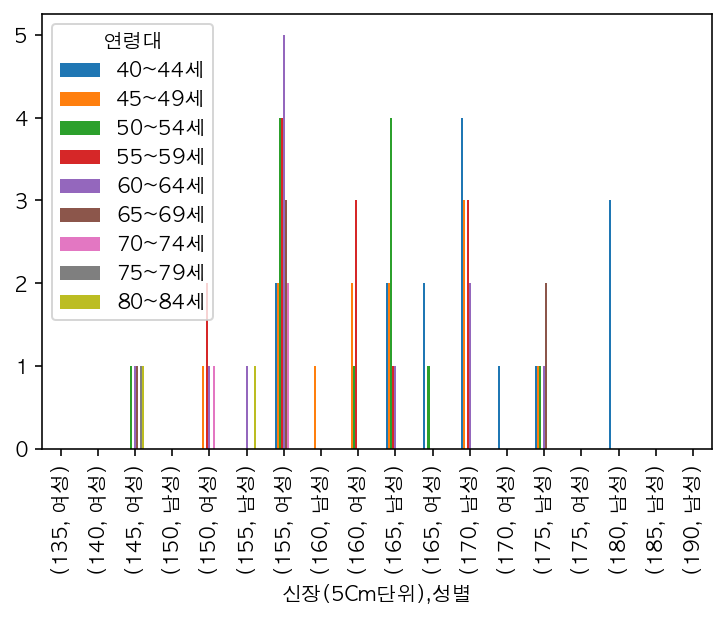

In [300]:
ssa_hgt.loc['서울특별시'].T.plot.bar()

In [315]:
df.groupby(by=['시도명', '연령대', '성별']).describe()

허리둘레                                                 \
                  count        mean        std    min      25%     50%   
시도명     연령대    성별                                                        
서울특별시   40~44세 남성  10.0   86.800000   7.901617   74.0   83.750   88.00   
               여성   5.0   74.400000   8.677557   66.0   67.000   72.00   
        45~49세 남성   7.0   81.585714   5.338673   72.0   79.550   82.00   
               여성   5.0   78.400000   8.018728   71.0   75.000   76.00   
        50~54세 남성   5.0   85.800000   6.340347   77.0   84.000   84.00   
               여성   7.0   75.742857   8.202003   63.5   73.000   75.00   
        55~59세 남성   4.0   77.500000  10.408330   63.0   73.500   80.50   
               여성   9.0   74.922222  11.056873   60.0   69.000   70.00   
        60~64세 남성   5.0   86.960000  13.251717   69.0   81.000   89.00   
               여성   7.0   74.857143   4.980916   68.0   71.000   75.00   
        65~69세 남성   2.0   88.950000   7.141778   83.9   86.425   88.95   
               여성   4.0   81.250000   5.439056   77.0   77.750   79.50   
        70~74세 여성   3.0   86.166667   6.331140   80.5   82.750   85.00   
        75~79세 여성   1.0   80.000000        NaN   80.0   80.000   80.00   
        80~84세 남성   1.0   82.000000        NaN   82.0   82.000   82.00   
               여성   1.0   67.000000        NaN   67.0   67.000   67.00   
부산광역시   40~44세 남성   1.0   87.000000        NaN   87.0   87.000   87.00   
               여성   4.0   76.250000   7.544314   69.0   70.500   75.50   
        45~49세 남성   1.0   84.000000        NaN   84.0   84.000   84.00   
               여성   1.0   74.000000        NaN   74.0   74.000   74.00   
        50~54세 남성   3.0   84.466667   5.608327   78.0   82.700   87.40   
               여성   4.0   75.075000   9.223656   65.0   70.400   74.10   
        55~59세 남성   1.0   84.000000        NaN   84.0   84.000   84.00   
               여성   3.0   69.066667   6.197849   65.0   65.500   66.00   
        60~64세 남성   4.0   83.000000   6.055301   74.0   82.250   85.50   
               여성   2.0   77.000000   4.242641   74.0   75.500   77.00   
        65~69세 남성   2.0   89.600000   2.262742   88.0   88.800   89.60   
               여성   2.0   82.850000   4.737615   79.5   81.175   82.85   
        70~74세 남성   1.0  100.000000        NaN  100.0  100.000  100.00   
               여성   2.0   82.200000   1.131371   81.4   81.800   82.20   
        75~79세 남성   1.0   94.000000        NaN   94.0   94.000   94.00   
        80~84세 여성   1.0   96.000000        NaN   96.0   96.000   96.00   
대구광역시   40~44세 남성   2.0   88.500000   7.778175   83.0   85.750   88.50   
               여성   3.0   77.333333   8.962886   67.0   74.500   82.00   
        45~49세 남성   2.0   96.500000   0.707107   96.0   96.250   96.50   
               여성   2.0   71.900000   6.929646   67.0   69.450   71.90   
        50~54세 남성   1.0   93.000000        NaN   93.0   93.000   93.00   
               여성   1.0   64.000000        NaN   64.0   64.000   64.00   
        55~59세 여성   4.0   75.125000   4.516175   69.0   73.125   76.25   
        60~64세 남성   2.0   88.000000  16.970563   76.0   82.000   88.00   
               여성   3.0   77.666667   6.658328   70.0   75.500   81.00   
        65~69세 여성   1.0   82.000000        NaN   82.0   82.000   82.00   
        70~74세 남성   2.0   88.500000   7.778175   83.0   85.750   88.50   
        85세+   남성   1.0   86.300000        NaN   86.3   86.300   86.30   
인천광역시   40~44세 남성   1.0  101.000000        NaN  101.0  101.000  101.00   
               여성   1.0   90.600000        NaN   90.6   90.600   90.60   
        45~49세 남성   1.0   81.100000        NaN   81.1   81.100   81.10   
               여성   4.0   72.750000   7.262920   64.0   68.500   73.25   
        50~54세 남성   3.0   80.666667   6.806859   73.0   78.000   83.00   
               여성   4.0   82.750000  18.679311   66.0   72.000   78.00   
        55~59세 남성   2.0   75.350000   0.070711   75.3   75.325   75.35   
               여성   3.0

In [316]:
df.columns

Index(['시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레',
       '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압', '이완기 혈압', '식전혈당(공복혈당)',
       '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤', '혈색소', '요단백',
       '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태', '음주여부',
       '구강검진 수검여부', '치아우식증유무', '치석', '시도명', '연령대', '성별'],
      dtype='object')

In [346]:
fig = px.pie(df, names='허리둘레', title='연령대별 허리둘레')
fig.update_traces(textposition='inside', textinfo='percent+label+value')
fig.show()

In [364]:
ss_waist = pd.crosstab([df['연령대']], [df['허리둘레']])
ss_waist

허리둘레,53.0,60.0,63.0,63.5,64.0,65.0,65.9,66.0,67.0,67.4,68.0,68.2,69.0,70.0,70.2,71.0,71.2,72.0,72.1,72.2,73.0,73.2,73.4,73.8,74.0,74.2,74.3,74.5,75.0,75.2,75.3,75.4,75.5,76.0,76.2,76.3,76.5,76.8,77.0,77.5,77.8,78.0,78.1,78.5,79.0,79.5,80.0,80.2,80.3,80.5,81.0,81.1,81.2,81.3,81.4,81.5,82.0,82.1,82.3,82.5,82.6,83.0,83.2,83.6,83.7,83.9,84.0,84.2,84.3,84.5,84.7,85.0,85.1,85.6,85.7,85.9,86.0,86.2,86.3,86.4,87.0,87.1,87.4,88.0,88.1,88.3,88.5,88.8,89.0,89.4,90.0,90.3,90.6,90.8,91.0,91.2,92.0,92.3,93.0,93.2,94.0,95.0,96.0,96.2,96.5,97.0,98.0,98.6,99.0,99.1,99.5,100.0,100.2,101.0,101.5,102.0,103.1,105.0,108.0,109.0,110.0
연령대,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
40~44세,1,0,0,0,0,1,0,1,4,0,3,1,3,2,0,2,0,1,1,0,1,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,2,1,0,1,0,0,2,0,3,0,0,0,2,0,0,0,0,0,4,0,0,0,0,4,0,1,0,0,3,1,0,0,0,4,0,0,0,0,2,0,0,0,3,0,0,2,1,0,1,1,0,1,1,0,1,0,0,0,1,0,1,0,1,1,1,1,0,0,2,1,0,0,0,0,0,1,0,1,0,0,0,0,0
45~49세,0,0,1,0,2,0,0,1,2,1,0,0,0,2,0,2,0,2,0,0,3,0,0,0,2,1,0,0,1,0,0,0,0,2,0,0,1,1,0,0,1,4,1,0,2,0,4,0,0,1,3,1,0,0,0,0,1,0,0,0,0,2,1,0,2,0,2,0,0,0,0,1,0,0,0,1,3,0,0,1,1,0,1,3,0,0,0,0,1,0,2,0,0,0,3,0,1,0,0,0,0,1,2,0,1,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
50~54세,0,0,1,1,1,3,1,1,1,0,0,0,0,1,0,2,0,1,0,1,1,0,1,0,3,1,1,0,4,0,0,1,1,4,0,0,0,0,2,0,0,2,0,0,1,0,2,0,0,0,3,0,0,0,0,0,5,0,0,2,0,5,0,0,0,0,4,0,0,0,1,0,0,0,0,0,2,0,0,0,2,1,1,3,0,0,0,0,3,0,4,1,0,0,1,0,4,0,2,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,2,1,0,1,1,0
55~59세,0,1,2,0,2,1,0,1,2,0,2,0,4,5,0,2,0,3,0,0,0,0,0,0,0,0,0,1,1,1,2,1,0,1,2,0,1,0,2,0,0,4,0,1,2,0,2,0,1,0,3,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,2,0,0,0,0,2,0,0,1,0,4,0,0,0,2,0,0,1,1,0,0,0,2,0,2,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60~64세,0,0,0,0,0,0,0,0,0,0,1,0,3,2,1,2,0,1,0,0,1,0,0,0,2,0,0,0,4,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,2,0,5,1,0,0,4,0,1,0,0,1,5,1,0,1,1,1,0,0,0,0,2,0,0,0,0,6,1,0,0,0,7,0,0,0,2,0,0,2,0,0,0,0,2,0,1,0,0,2,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0
65~69세,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,1,2,0,0,0,2,0,0,0,0,0,2,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,3,1,0,0,1,0,0,2,0,0,0,0,1,0,4,0,0,0,1,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0
70~74세,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,2,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
75~79세,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80~84세,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [365]:
fig = px.line(ss_waist)
fig.show()

/Users/yeomss/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1222: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/yeomss/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1222: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/yeomss/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1222: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once

In [396]:
import json

state_geo = './data/TL_SCCO_CTPRVN.json'
state_geo

with open(state_geo, encoding='utf-8') as file:
    sido_map = json.load(file)

# sido_map['features']

In [406]:
dfdf = df.groupby('시도명').count()
dfdf.head(3)

,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,연령대,성별
시도명,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시,76,76,76,76,76,76,76,76,76,76,76,76,76,30,30,30,30,76,76,76,76,76,76,76,76,76,21,21,76,76
부산광역시,33,33,33,33,33,33,33,33,33,33,32,32,32,16,16,16,16,32,32,32,32,32,32,33,33,33,8,8,33,33
대구광역시,24,24,24,24,24,24,24,24,24,24,24,24,24,6,6,6,6,24,24,24,24,24,24,24,24,24,1,1,24,24


In [416]:
sido_map['features'][0]['properties']['CTP_KOR_NM']


'강원도'

In [541]:
dfdf = df.groupby('시도명', as_index=False).mean()
dfdf


,시도명,허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피
0,서울특별시,80.207895,123.473684,76.065789,98.500000,206.900000,102.166667,60.233333,126.100000,14.203947,0.834211,24.592105,22.407895,35.921053
1,부산광역시,81.218182,122.156250,76.281250,103.156250,203.875000,111.250000,62.250000,119.000000,13.940625,0.800000,24.218750,21.062500,40.125000
2,대구광역시,81.566667,121.375000,75.458333,106.125000,197.500000,102.833333,59.333333,117.166667,14.333333,0.858333,28.875000,30.250000,34.041667
3,인천광역시,80.748276,126.689655,80.413793,106.344828,189.333333,133.666667,58.000000,107.545455,13.934483,0.813793,27.034483,21.862069,52.310345
4,광주광역시,83.646154,126.692308,75.000000,98.923077,242.500000,136.000000,48.500000,166.500000,14.430769,0.800000,35.538462,43.461538,117.461538
5,대전광역시,81.300000,127.214286,79.571429,114.214286,155.666667,196.000000,42.833333,73.333333,13.464286,0.785714,28.285714,28.142857,42.785714
6,울산광역시,81.692308,130.307692,80.076923,104.615385,169.000000,108.200000,55.800000,91.200000,14.892308,0.900000,31.769231,32.076923,34.846154
7,세종특별자치시,80.275000,123.500000,75.500000,92.000000,196.333333,88.333333,63.333333,114.666667,13.750000,0.800000,22.250000,21.500000,21.750000
8,경기도,83.215441,125.305970,77.537313,106.223881,206.075758,138.287879,56.045455,123.095238,14.319403,0.846269,28.149254,27.858209,39.514925
9,강원도,80.800000,129.071429,78.000000,110.928571,192.666667,88.666667,65.666667,109.333333,15.092857,0.885714,27.428571,22.071429,30.642857


In [548]:
dfdf.iloc[0, 0]

'서울특별시'

In [554]:
df['시도명'].value_counts()

경기도        136
서울특별시       76
부산광역시       33
경상북도        32
경상남도        31
인천광역시       29
대구광역시       24
충청남도        23
전라남도        23
전라북도        19
대전광역시       15
강원도         14
광주광역시       13
울산광역시       13
충청북도        13
세종특별자치시      4
제주특별자치도      2
Name: 시도명, dtype: int64

In [665]:
locs = {
    '경기도':   (37.567167, 127.190292),
    '서울특별시':     (37.487935, 126.857758),
    '부산광역시':    (35.198362, 129.053922),
    '경상북도':  (36.248647, 128.664734),
    '경상남도': (35.259787, 128.664734),
    '인천광역시':  (37.469221, 126.573234),
    '대구광역시': (35.798838, 128.583052),
    '충청남도': (36.557229, 126.779757),
    '전라남도':  (34.819400, 126.893113),
    '전라북도':  (35.716705, 127.144185),
    '대전광역시':   (36.321655, 127.378953),
    '강원도': (37.555837, 128.209315),
    '광주광역시': (35.126033, 126.831302),
    '울산광역시': (35.519301, 129.239078),
    '충청북도': (36.628503, 127.929344),
    '세종특별자치시':    (36.48, 127.29),
    '제주특별자치도':   (33.364805, 126.542671),
}

locs

{'경기도': (37.567167, 127.190292),
 '서울특별시': (37.487935, 126.857758),
 '부산광역시': (35.198362, 129.053922),
 '경상북도': (36.248647, 128.664734),
 '경상남도': (35.259787, 128.664734),
 '인천광역시': (37.469221, 126.573234),
 '대구광역시': (35.798838, 128.583052),
 '충청남도': (36.557229, 126.779757),
 '전라남도': (34.8194, 126.893113),
 '전라북도': (35.716705, 127.144185),
 '대전광역시': (36.321655, 127.378953),
 '강원도': (37.555837, 128.209315),
 '광주광역시': (35.126033, 126.831302),
 '울산광역시': (35.519301, 129.239078),
 '충청북도': (36.628503, 127.929344),
 '세종특별자치시': (36.48, 127.29),
 '제주특별자치도': (33.364805, 126.542671)}

In [568]:
for key, value in locs.items():
    # print(key, lat, lon)
    print(key, value[0], value[1])

경기도 37.567167 127.190292
서울특별시 37.487935 126.857758
부산광역시 35.198362 129.053922
경상북도 36.248647 128.664734
경상남도 35.259787 128.664734
인천광역시 37.469221 126.573234
대구광역시 35.798838 128.583052
충청남도 36.557229 126.779757
전라남도 34.8194 126.893113
전라북도 35.716705 127.144185
대전광역시 36.321655 127.378953
강원도 37.555837 128.209315
광주광역시 35.126033 126.831302
울산광역시 35.519301 129.239078
충청북도 36.628503 127.929344
세종특별자치시 0 0
제주특별자치도 33.364805 126.542671


In [583]:
dfdf

,시도명,허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피
0,서울특별시,80.207895,123.473684,76.065789,98.500000,206.900000,102.166667,60.233333,126.100000,14.203947,0.834211,24.592105,22.407895,35.921053
1,부산광역시,81.218182,122.156250,76.281250,103.156250,203.875000,111.250000,62.250000,119.000000,13.940625,0.800000,24.218750,21.062500,40.125000
2,대구광역시,81.566667,121.375000,75.458333,106.125000,197.500000,102.833333,59.333333,117.166667,14.333333,0.858333,28.875000,30.250000,34.041667
3,인천광역시,80.748276,126.689655,80.413793,106.344828,189.333333,133.666667,58.000000,107.545455,13.934483,0.813793,27.034483,21.862069,52.310345
4,광주광역시,83.646154,126.692308,75.000000,98.923077,242.500000,136.000000,48.500000,166.500000,14.430769,0.800000,35.538462,43.461538,117.461538
5,대전광역시,81.300000,127.214286,79.571429,114.214286,155.666667,196.000000,42.833333,73.333333,13.464286,0.785714,28.285714,28.142857,42.785714
6,울산광역시,81.692308,130.307692,80.076923,104.615385,169.000000,108.200000,55.800000,91.200000,14.892308,0.900000,31.769231,32.076923,34.846154
7,세종특별자치시,80.275000,123.500000,75.500000,92.000000,196.333333,88.333333,63.333333,114.666667,13.750000,0.800000,22.250000,21.500000,21.750000
8,경기도,83.215441,125.305970,77.537313,106.223881,206.075758,138.287879,56.045455,123.095238,14.319403,0.846269,28.149254,27.858209,39.514925
9,강원도,80.800000,129.071429,78.000000,110.928571,192.666667,88.666667,65.666667,109.333333,15.092857,0.885714,27.428571,22.071429,30.642857


In [617]:
# import re

# re.findall('\d+', str(dfdf.loc[dfdf['시도명'] == '부산광역시', '허리둘레'])) 
(dfdf.loc[dfdf['시도명'] == '부산광역시', '허리둘레']).to_string().split(' ')[-1]


'81.218182'

In [849]:
locs2 = {
    '경기도':   (37.95, 126.95),
    '서울특별시':     (37.58, 126.7),
    '부산광역시':    (35.198362, 129.053922),
    '경상북도':  (36.63, 128.46),
    '경상남도': (35.5, 128),
    '인천광역시':  (37.5, 125.8),
    '대구광역시': (35.96, 128.32),
    '충청남도': (36.69, 126),
    '전라남도':  (34.819400, 126.893113),
    '전라북도':  (35.86, 126.85),
    '대전광역시':   (36.321655, 127.378953),
    '강원도': (37.88, 128),
    '광주광역시': (35.28, 126.49),
    '울산광역시': (35.65, 129.1),
    '충청북도': (37.19, 127.50),
    '세종특별자치시':    (36.7, 127.07),
    '제주특별자치도':   (33.62, 126.11),
}


In [850]:
import folium
from folium.features import DivIcon

m = folium.Map(location=[35.8, 129.071503], zoom_start=7,)

ch = folium.Choropleth(
 geo_data=sido_map,
 name='choropleth',
 data=dfdf,
 columns=['시도명', '허리둘레'],
 key_on='feature.properties.CTP_KOR_NM',
 fill_color='YlGnBu',
 fill_opacity=0.7,
 line_opacity=1,
 line_weight=1.5,
 line_color='#000',
 legend_name='허리둘레',
#  highlight=True,
).add_to(m)

for key, value in locs2.items():
    folium.map.Marker(
        [value[0], value[1]],
        icon=DivIcon(
            icon_size=(250, 36),
            icon_anchor=(0, 0),
            html='<div style="font-size: 1.3rem; color: black; background-color:rgba(255, 255, 255, 0.3); width:80px; text-align:center; margin:0px;">' +"<b>" + key + "<br/>"  +
            '<span style="color: red; margin: 0px;">' + (dfdf.loc[dfdf['시도명'] == key, '허리둘레']).to_string().split(' ')[-1] + '</span>'  + '</b></div>',
        )).add_to(m)

folium.LayerControl().add_to(m)

# ch.geojson.add_child(
#     folium.features.GeoJsonTooltip(['CTP_KOR_NM'], labels=False)
# )

# m.save('save.html')
m

In [828]:
# pip3 install imgkit
# brew install --cask wkhtmltopdf

# import imgkit

# path = r'/usr/local/bin/wkhtmltoimage'
# config = imgkit.config(wkhtmltoimage=path)

# imgkit.from_file('table.html', 'table.jpg',config=config)
# imgkit.from_url('http://www.naver.com', 'out.png')
# imgkit.from_file('save.html', 'out.png')


Loading page (1/2)
libpng warning: iCCP: known incorrect sRGB profile           ] 60%
Rendering (2/2)                                                    
Done                                                               


True

In [842]:
# conda install -c conda-forge pyppeteer
from folium import utilities
from pyppeteer import launch

html = m.get_root().render()
browser = await launch(headless=True)

# path = '/Users/yeomss/Repository/Github/Boot-Project/Like-Lion-AI/Mini-Project/3주차/save.html'
page = await browser.newPage()
with utilities.temp_html_filepath(html) as fname:
    await page.goto('file://{path}'.format(path=fname))

img_data = await page.screenshot({'path': 'out2.png', 'fullPage': 'true', })
await browser.close()

# im = Image.open(img_data)
# im.save('out2.png')
# img_data.